In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import glob
import shutil

import cv2
import random
import pickle


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
DIRECTORY='/kaggle/input/herbs-plant-dataset/herbs classification'
print(DIRECTORY)
#print(os.listdir())
os.chdir("/kaggle/input/herbs-plant-dataset/herbs classification")
print(os.listdir())

/kaggle/input/herbs-plant-dataset/herbs classification
['test', 'train']


In [30]:
#train_path=DIRECTORY+'/train'
train_path='train'
valid_path='valid'
test_path='test'
print(test_path)
os.listdir(test_path)

test


['tulshi',
 'kamini',
 'gada',
 'durba',
 'alovera',
 'joba',
 'dirghaiu shak',
 'bonjui',
 'shojna',
 'refuzee',
 'ada',
 'thankuni']

In [31]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path,target_size=(224,224),  batch_size=10)

#valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#.flow_from_directory(directory=valid_path,target_size=(224,224),  batch_size=10)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path,target_size=(224,224),  batch_size=10,shuffle=False)

Found 336 images belonging to 12 classes.
Found 282 images belonging to 12 classes.


In [32]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
#model.summary()

model = Sequential()
for layer in vgg16_model.layers[:-2]:
    print(layer)
    model.add(layer)
    
for layer in model.layers[:-5]:
    #print(layer)
    layer.trainable = False

model.add(Dense(units=12, activation='softmax',  name='predictions'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [34]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
hist=model.fit(x=train_batches, validation_data=test_batches, epochs=50,verbose=2)

Epoch 1/50
34/34 - 30s - loss: 2.0881 - accuracy: 0.5060 - val_loss: 0.0993 - val_accuracy: 0.9752 - 30s/epoch - 872ms/step
Epoch 2/50
34/34 - 29s - loss: 0.1240 - accuracy: 0.9702 - val_loss: 0.0473 - val_accuracy: 0.9929 - 29s/epoch - 847ms/step
Epoch 3/50
34/34 - 28s - loss: 0.0607 - accuracy: 0.9940 - val_loss: 0.0273 - val_accuracy: 0.9965 - 28s/epoch - 822ms/step
Epoch 4/50
34/34 - 29s - loss: 0.0464 - accuracy: 0.9940 - val_loss: 0.0253 - val_accuracy: 0.9965 - 29s/epoch - 854ms/step
Epoch 5/50
34/34 - 28s - loss: 0.0264 - accuracy: 0.9970 - val_loss: 0.0257 - val_accuracy: 0.9965 - 28s/epoch - 812ms/step
Epoch 6/50
34/34 - 30s - loss: 0.0395 - accuracy: 0.9940 - val_loss: 0.0243 - val_accuracy: 0.9965 - 30s/epoch - 869ms/step
Epoch 7/50
34/34 - 28s - loss: 0.0242 - accuracy: 0.9970 - val_loss: 0.0238 - val_accuracy: 0.9965 - 28s/epoch - 819ms/step
Epoch 8/50
34/34 - 29s - loss: 0.0367 - accuracy: 0.9940 - val_loss: 0.0225 - val_accuracy: 0.9965 - 29s/epoch - 851ms/step
Epoch 9/

In [36]:
print(hist.history['loss'])


[2.0881364345550537, 0.12395559251308441, 0.06068987399339676, 0.0464378297328949, 0.026442065834999084, 0.03947775810956955, 0.02420659363269806, 0.03673386573791504, 0.0361226424574852, 0.018938276916742325, 0.03430015221238136, 0.020999060943722725, 0.032882947474718094, 0.032511431723833084, 0.017840145155787468, 0.03239118307828903, 0.018207402899861336, 0.030991068109869957, 0.017376361414790154, 0.030761893838644028, 0.01657732203602791, 0.016752205789089203, 0.017208347097039223, 0.01563108339905739, 0.016978086903691292, 0.015775026753544807, 0.016045168042182922, 0.029374122619628906, 0.028763754293322563, 0.015132906846702099, 0.01592262275516987, 0.028327686712145805, 0.014875872991979122, 0.015507803298532963, 0.02783212810754776, 0.027171975001692772, 0.014823626726865768, 0.014981015585362911, 0.01474837213754654, 0.026953157037496567, 0.026699259877204895, 0.026360034942626953, 0.026201322674751282, 0.014021879062056541, 0.014095638878643513, 0.025776078924536705, 0.025

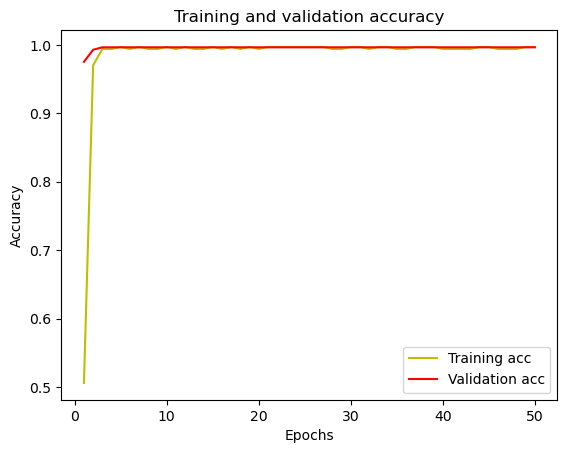

In [37]:
#plot the training and validation accuracy at each epoch
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

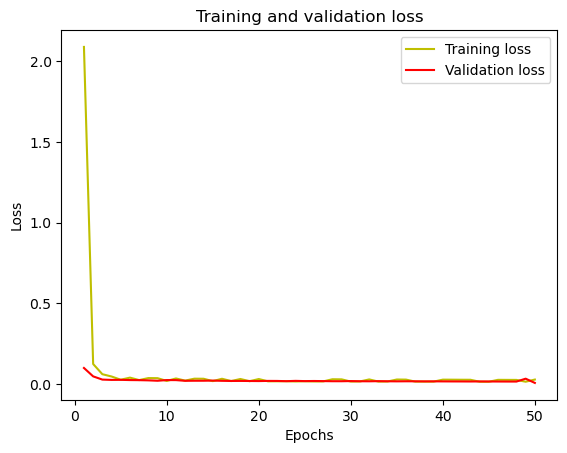

In [38]:
#plot the training and validation  loss at each epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
test_labels=test_batches.classes
test_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8

In [40]:
predict=model.predict(x=test_batches, verbose=0)
#print(predict[0])
print(predict.argmax(axis=1))

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11  3 11 11 11 11 11 11]


[[12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  1  0  0  0  0  0  0  0 23]]


<Axes: >

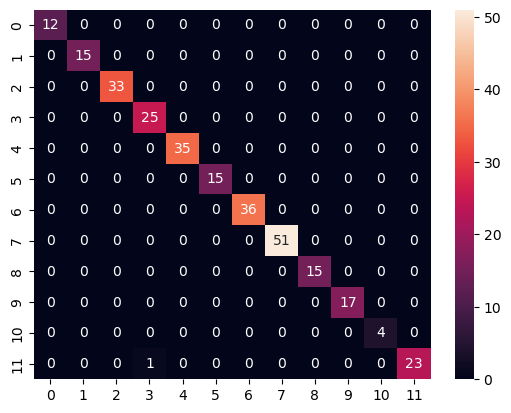

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predict.argmax(axis=1))

print(cm)

sns.heatmap(cm, annot=True)

In [42]:
# Showing the Classification report 
from sklearn.metrics import classification_report
cr=classification_report(test_labels, predict.argmax(axis=1))
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        33
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        51
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00         4
          11       1.00      0.96      0.98        24

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load ResNet-101 model without classification layers and specify input shape
base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(12, activation='softmax')(x)

# Create a new model combining the base ResNet-101 and the custom classification layers
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model_resnet.layers:
    layer.trainable = False

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(train_batches, validation_data=test_batches, epochs=50)# Create ResNet-101 model
resnet_model = ResNet101(weights='imagenet', include_top=False)
model_resnet = Sequential()
model_resnet.add(resnet_model)
model_resnet.add(Dense(units=12, activation='softmax', name='predictions'))

for layer in model_resnet.layers[0].layers[:-6]:
    layer.trainable = False

model_resnet.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

171446536/171446536 [==============================] - 5s 0us/step
Epoch 1/50
34/34 [==============================] - 37s 923ms/step - loss: 1.4981 - accuracy: 0.5208 - val_loss: 0.4003 - val_accuracy: 0.9184
Epoch 2/50
34/34 [==============================] - 29s 849ms/step - loss: 0.2797 - accuracy: 0.9375 - val_loss: 0.1496 - val_accuracy: 0.9858
Epoch 3/50
34/34 [==============================] - 27s 794ms/step - loss: 0.1304 - accuracy: 0.9881 - val_loss: 0.0751 - val_accuracy: 0.9965
Epoch 4/50
34/34 [==============================] - 29s 864ms/step - loss: 0.0782 - accuracy: 0.9911 - val_loss: 0.0503 - val_accuracy: 0.9965
Epoch 5/50
34/34 [==============================] - 28s 826ms/step - loss: 0.0552 - accuracy: 0.9940 - val_loss: 0.0384 - val_accuracy: 0.9965
Epoch 6/50
34/34 [==============================] - 28s 833ms/step - loss: 0.0436 - accuracy: 0.9940 - val_loss: 0.0311 - val_accuracy: 0.9965
Epoch 7/50
34/34 [==============================] - 28s 830ms/step - loss: 

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load Xception model without classification layers and specify input shape
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers
x = base_model_xception.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(12, activation='softmax')(x)

# Create a new model combining the base Xception and the custom classification layers
model_xception = Model(inputs=base_model_xception.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model_xception.layers:
    layer.trainable = False

model_xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_xception = model_xception.fit(train_batches, validation_data=test_batches, epochs=50)


Epoch 1/50
34/34 [==============================] - 35s 952ms/step - loss: 3.4930 - accuracy: 0.2054 - val_loss: 1.8710 - val_accuracy: 0.3688
Epoch 2/50
34/34 [==============================] - 30s 899ms/step - loss: 1.6194 - accuracy: 0.4464 - val_loss: 0.9775 - val_accuracy: 0.6738
Epoch 3/50
34/34 [==============================] - 32s 949ms/step - loss: 0.9616 - accuracy: 0.6756 - val_loss: 0.6273 - val_accuracy: 0.8050
Epoch 4/50
34/34 [==============================] - 30s 899ms/step - loss: 0.6578 - accuracy: 0.8065 - val_loss: 0.5176 - val_accuracy: 0.8440
Epoch 5/50
34/34 [==============================] - 31s 922ms/step - loss: 0.4879 - accuracy: 0.8661 - val_loss: 0.3580 - val_accuracy: 0.9149
Epoch 6/50
34/34 [==============================] - 31s 918ms/step - loss: 0.3786 - accuracy: 0.8899 - val_loss: 0.2859 - val_accuracy: 0.9504
Epoch 7/50
34/34 [==============================] - 31s 908ms/step - loss: 0.2927 - accuracy: 0.9405 - val_loss: 0.2200 - val_accuracy: 0.9574

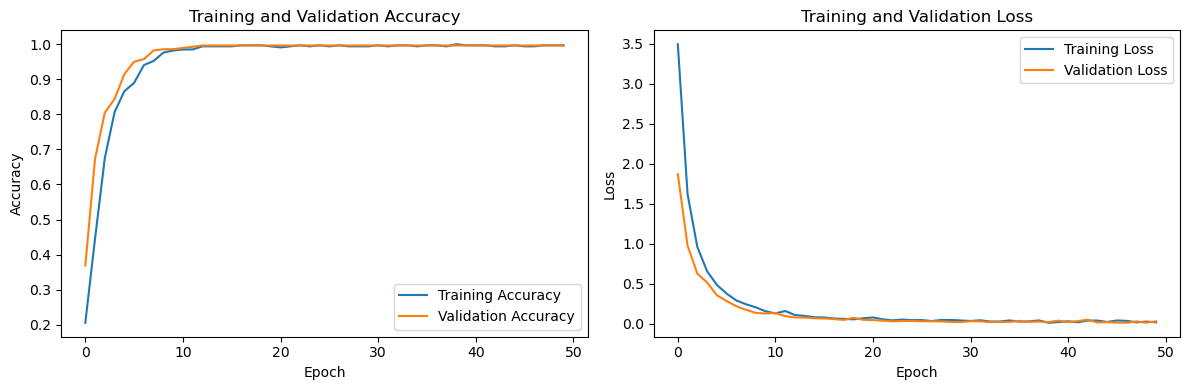

In [48]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_xception.history['accuracy'], label='Training Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_xception.history['loss'], label='Training Loss')
plt.plot(history_xception.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


29/29 [==============================] - 13s 413ms/step
Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  1]
 [ 0  0  0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24]]
Classification Report:
               precision    recall  f1-score   support

          ada       1.00      1.00      1.00        12
      alovera       1.00      1.00      1.00        15
       bonjui       1.00      1.00      1.00        33
dirghaiu shak       1.00      0.96      0.98        25
        durba       1.00      1.00      1.00        35
         gada       1.00      1.00      1.00        15
         joba       1.00      1.00      1.00    

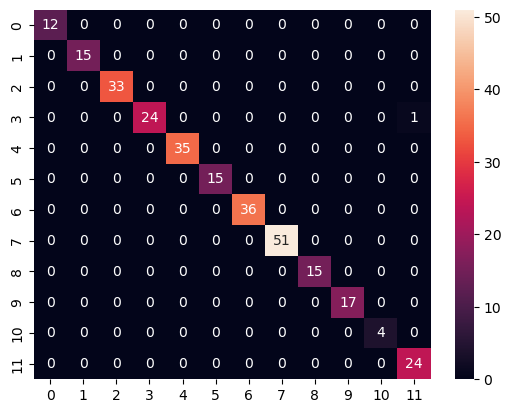

In [52]:

# Evaluate on test set and generate confusion matrix
predictions =  model_xception.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
confusion_mat = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True)

# Display classification report
class_names = list(test_batches.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)

Found 336 images belonging to 12 classes.
Found 282 images belonging to 12 classes.
Epoch 1/50
34/34 - 39s - loss: 3.0086 - accuracy: 0.1280 - val_loss: 2.8417 - val_accuracy: 0.1454 - 39s/epoch - 1s/step
Epoch 2/50
34/34 - 31s - loss: 2.7236 - accuracy: 0.1518 - val_loss: 2.5905 - val_accuracy: 0.1738 - 31s/epoch - 912ms/step
Epoch 3/50
34/34 - 30s - loss: 2.5191 - accuracy: 0.1815 - val_loss: 2.4006 - val_accuracy: 0.2163 - 30s/epoch - 894ms/step
Epoch 4/50
34/34 - 31s - loss: 2.3607 - accuracy: 0.2292 - val_loss: 2.2490 - val_accuracy: 0.2801 - 31s/epoch - 924ms/step
Epoch 5/50
34/34 - 31s - loss: 2.2310 - accuracy: 0.2649 - val_loss: 2.1201 - val_accuracy: 0.2979 - 31s/epoch - 906ms/step
Epoch 6/50
34/34 - 31s - loss: 2.1170 - accuracy: 0.2946 - val_loss: 2.0071 - val_accuracy: 0.3333 - 31s/epoch - 911ms/step
Epoch 7/50
34/34 - 30s - loss: 2.0154 - accuracy: 0.3214 - val_loss: 1.9053 - val_accuracy: 0.3617 - 30s/epoch - 887ms/step
Epoch 8/50
34/34 - 30s - loss: 1.9229 - accuracy: 0

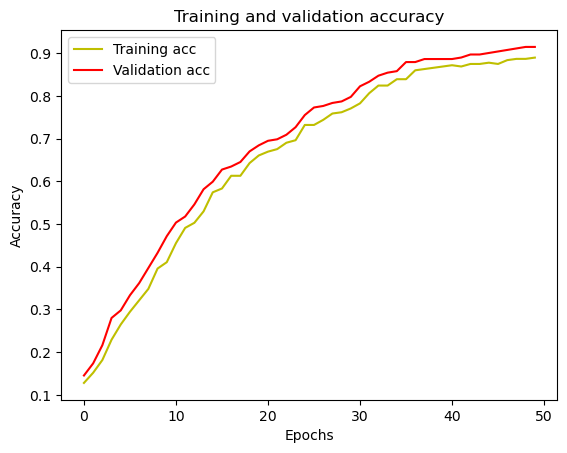

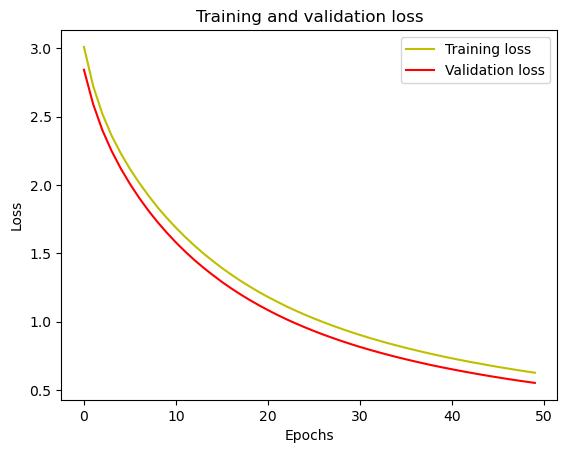

29/29 [==============================] - 16s 449ms/step
Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  1  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  1  2  0  0  1]
 [ 0  0  2 18  0  0  0  4  0  0  0  1]
 [ 0  0  0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  3  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 51  0  0  0  0]
 [ 0  0  1  3  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  3  0]
 [ 0  0  0  1  1  0  0  1  1  0  0 20]]
Classification Report:
               precision    recall  f1-score   support

          ada       1.00      1.00      1.00        12
      alovera       1.00      0.93      0.97        15
       bonjui       0.83      0.88      0.85        33
dirghaiu shak       0.82      0.72      0.77        25
        durba       0.95      1.00      0.97        35
         gada       1.00      1.00      1.00        15
         joba       1.00      0.92      0.96    

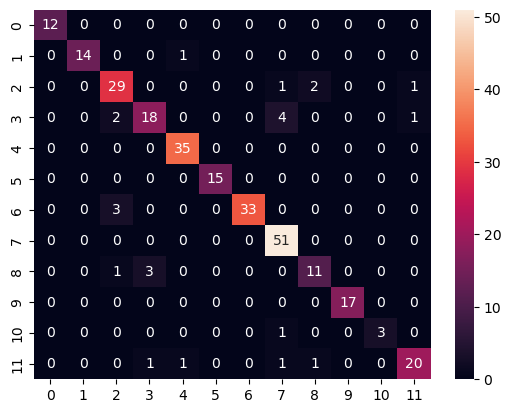

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

DIRECTORY = '/kaggle/input/herbs-plant-dataset/herbs classification'
train_path = 'train'
test_path = 'test'

# Load the training and test datasets using ImageDataGenerator
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

# Load the pre-trained ResNet-101 model
resnet_model = tf.keras.applications.ResNet101(weights='imagenet', include_top=False)

# Freeze layers in the ResNet-101 model
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model by adding layers on top of the ResNet-101 base
model = Sequential([
    resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(units=12, activation='softmax', name='predictions')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(x=train_batches, validation_data=test_batches, epochs=50, verbose=2)

# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], 'y', label='Training acc')
plt.plot(hist.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(hist.history['loss'], 'y', label='Training loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test set and generate confusion matrix
predictions = model.predict(test_batches)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
confusion_mat = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True)

# Display classification report
class_names = list(test_batches.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(report)
